E3Q3

In [79]:
%config InlineBackend.figure_format='retina'
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

from keras.models import Sequential
from keras.losses import mean_squared_error
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.initializers import RandomUniform
from keras import utils
import math

# loading the MNIST (or digits) dataset in keras
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# the first time you run this you need to have internet so it can download the data

# some of the layers we discussed in class, checkout the documentation if you need more
# or want to experiment
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   4  29 117 241 255 253
  253 203  76   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  26 128 252 252 252 253 252
  252 252 244  82   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  67 210 253 252 252 25

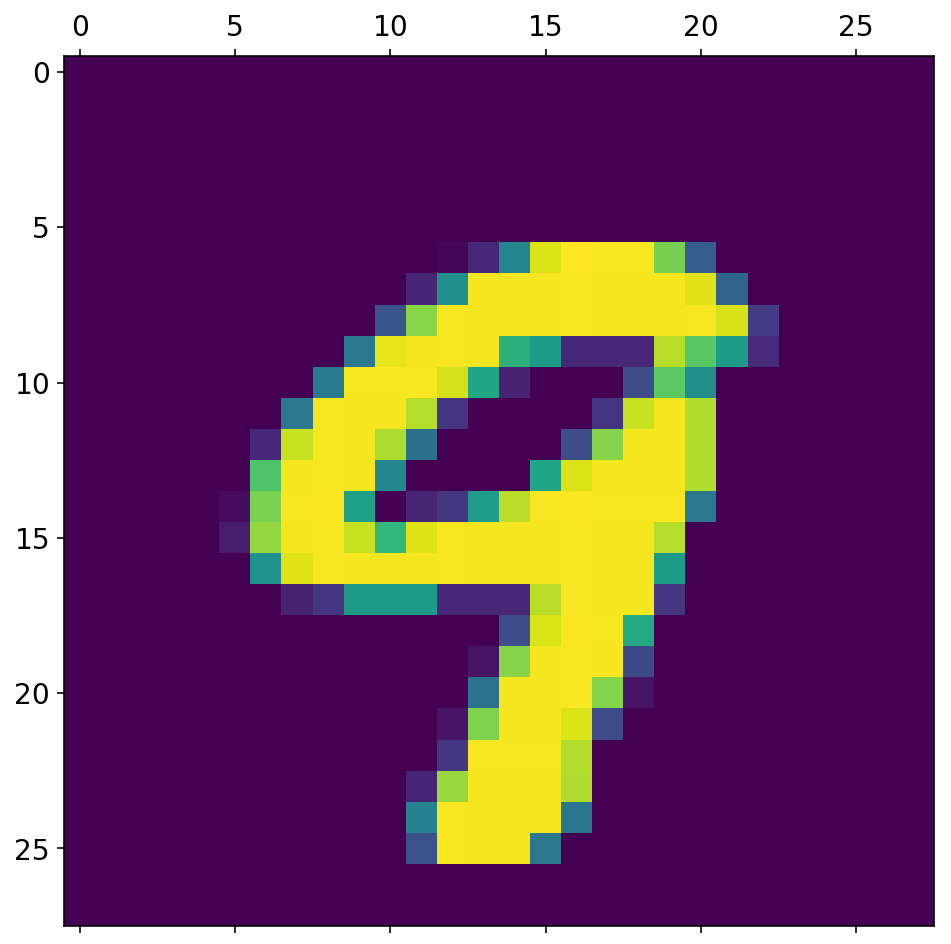

In [80]:
fig1 = plt.figure()
print(X_train[763])
ax1 = fig1.add_subplot(111)
ax=763
cax1 = ax1.matshow(np.array(X_train[ax]))



In [81]:
print(y_train[ax])

9


In [82]:
DXtr = X_train
DXte = X_test
DYtr = y_train
DYte = y_test
print(np.shape(DXtr))
print(np.shape(DYtr))

X_train = X_train.reshape(60000, 28*28,)
X_test  = X_test.reshape(10000, 28*28,)


X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')



num_classes=10
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

(60000, 28, 28)
(60000,)


Firtly, the fully connected network is tested

In [83]:
model = Sequential()

model.add(Dense(500, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))


model.compile(loss=mean_squared_error, optimizer=SGD(lr=0.001), metrics=['accuracy'])

In [84]:
history= model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=True, validation_data=(X_test, y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s - loss: 0.1594 - acc: 0.1938 - val_loss: 0.1353 - val_acc: 0.3156

In [85]:
#fig2 = plt.figure()
#ax2 = fig2.add_subplot(111)
#ax=763
#ax2 = ax2.matshow(np.array(X_train[ax]) )
#print (X_test[0])
#model.predict( X_test[0] )

In [86]:
finalscore = model.evaluate(X_test, y_test, verbose=False)
print (finalscore)
print('Calculated test loss:', finalscore[0])
print('Calculated test accuracy:', finalscore[1])

[0.019681493912208008, 0.89949999999999997]
Calculated test loss: 0.0196814939122
Calculated test accuracy: 0.8995


Now the model using ConvNet is examined:

In [52]:
img_rows, img_cols = 28, 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)
input_shape = (img_rows, img_cols, 1)


In [70]:

cnn = Sequential()
cnn.add(Conv2D(4, kernel_size=(3, 3), input_shape=input_shape,padding='same')) 
cnn.add(Activation('relu'))


In [71]:

cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(num_classes, activation='softmax'))
cnn.compile(loss=mean_squared_error,optimizer=SGD(lr=0.001), metrics=['accuracy'])


In [73]:

cnn.fit(X_train, y_train, epochs=20, batch_size=200, validation_split=0.2, verbose=True, validation_data=(X_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 51s - loss: 0.1624 - acc: 0.1675 - val_loss: 0.1151 - val_acc: 0.3991

In [74]:
finalscore = cnn.evaluate(X_test, y_test, verbose=False)
print('Calculated cnn test loss:', finalscore[0])
print('Calculated cnn tst accuracy:', finalscore[1])

Calculated cnn test loss: 0.0378775471404
Calculated cnn tst accuracy: 0.8016


So after a long series of tests it can be concluded that icreasing number of epochs leads to improvements in accuracy, decreasing batch_size leads to improvements for both cases of fully connected network and for cnn. However, each of this improvements has its price taken in prolonged computation time.